# Predicting Characteristics of Electrons Produced by Dielectrons Created in CERN Pb-Pb Collisions

## 1. Data Description

The CMS collaboration has approved the release of 100k dielectron events in the invariant mass range 2-110 GeV for use in outreach and education. This document contains the files for this release.

These data were selected for use in education and outreach and contain a subset of the total event information. The selection criteria may be different from that used in CMS physics results. They are not suitable for a full physics analysis.

## 2. Import Libraries

In [1]:
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn                 import tree
from sklearn.utils           import parallel_backend
from sklearn.dummy           import DummyClassifier
from sklearn.metrics         import accuracy_score, confusion_matrix
from sklearn.ensemble        import RandomForestClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV

import tensorflow as tf

## 3. Read Data

In [2]:
df = pd.read_csv('dielectron.csv')
df

Run      Event        E1       px1         py1       pz1       pt1  \
0      147115  366639895  58.71410  -7.311320  10.531000 -57.29740  12.82020   
1      147115  366704169   6.61188  -4.152130  -0.579855  -5.11278   4.19242   
2      147115  367112316  25.54190 -11.480900   2.041680  22.72460  11.66100   
3      147115  366952149  65.39590   7.512140  11.887100  63.86620  14.06190   
4      147115  366523212  61.45040   2.952840 -14.622700 -59.61210  14.91790   
...       ...        ...       ...        ...        ...       ...       ...   
99995  146511  522575834  12.31310 -10.658000   5.164440   3.36858  11.84330   
99996  146511  522786431  18.46420   7.854990  15.133000  -7.08659  17.05020   
99997  146511  522906124   4.18566  -3.273500  -0.308507  -2.59013   3.28801   
99998  146511  523243830  54.46220  11.352600  11.880900  51.92400  16.43280   
99999  146511  524172389   7.64000   0.886162   5.478900  -5.25033   5.55010   

           eta1      phi1  Q1        E2        px2      py2        pz2  \
0     -2.202670  2.177660   1  11.28360  -1.032340 -1.88066 -11.077800   
1     -1.028420 -3.002840  -1  17.14920 -11.713500  5.04474  11.464700   
2      1.420480  2.965600   1  15.82030  -1.472800  2.25895 -15.588800   
3      2.218380  1.007210   1  25.12730   4.087860  2.59641  24.656300   
4     -2.093750 -1.371540  -1  13.88710  -0.277757 -2.42560 -13.670800   
...         ...       ...  ..       ...        ...      ...        ...   
99995  0.280727  2.690370  -1   1.80181   0.668609 -1.58437   0.537805   
99996 -0.404510  1.092010   1  14.69110  -1.418020 -2.28117 -14.443500   
99997 -0.723075 -3.047630   1  72.81740 -11.074900 -9.28179 -71.369300   
99998  1.867800  0.808132  -1   8.58671   0.378009  3.07828   8.007050   
99999 -0.842662  1.410440   1  52.10880  16.807500 -4.60510  49.108400   

            pt2      eta2      phi2  Q2         M  
0       2.14537 -2.344030 -2.072810  -1   8.94841  
1      12.75360  0.808077  2.734920   1  15.89300  
2       2.69667 -2.455080  2.148570   1  38.38770  
3       4.84272  2.330210  0.565865  -1   3.72862  
4       2.44145 -2.423700 -1.684810  -1   2.74718  
...         ...       ...       ...  ..       ...  
99995   1.71967  0.307851 -1.171470   1   8.44779  
99996   2.68598 -2.383880 -2.126960   1  20.71540  
99997  14.45010 -2.300410 -2.444050  -1  12.71350  
99998   3.10141  1.677170  1.448610   1   4.69670  
99999  17.42700  1.759250 -0.267427  -1  36.50430  

[100000 rows x 19 columns]

### 3.1. Clean data.

#### 3.1.1. Rename column with extra space.

In [3]:
df = df.rename({'px1 ' : 'px1'}, axis = 1)
df.head(5)

Run      Event        E1       px1        py1       pz1       pt1  \
0  147115  366639895  58.71410  -7.31132  10.531000 -57.29740  12.82020   
1  147115  366704169   6.61188  -4.15213  -0.579855  -5.11278   4.19242   
2  147115  367112316  25.54190 -11.48090   2.041680  22.72460  11.66100   
3  147115  366952149  65.39590   7.51214  11.887100  63.86620  14.06190   
4  147115  366523212  61.45040   2.95284 -14.622700 -59.61210  14.91790   

      eta1     phi1  Q1       E2        px2      py2      pz2       pt2  \
0 -2.20267  2.17766   1  11.2836  -1.032340 -1.88066 -11.0778   2.14537   
1 -1.02842 -3.00284  -1  17.1492 -11.713500  5.04474  11.4647  12.75360   
2  1.42048  2.96560   1  15.8203  -1.472800  2.25895 -15.5888   2.69667   
3  2.21838  1.00721   1  25.1273   4.087860  2.59641  24.6563   4.84272   
4 -2.09375 -1.37154  -1  13.8871  -0.277757 -2.42560 -13.6708   2.44145   

       eta2      phi2  Q2         M  
0 -2.344030 -2.072810  -1   8.94841  
1  0.808077  2.734920   1  15.89300  
2 -2.455080  2.148570   1  38.38770  
3  2.330210  0.565865  -1   3.72862  
4 -2.423700 -1.684810  -1   2.74718

#### 3.1.2. Remove records with NA values.

In [4]:
df = df.dropna()
df.shape

(99915, 19)

## 4. Exploratory Data Analysis

### 4.1. How many Events occur per Run?

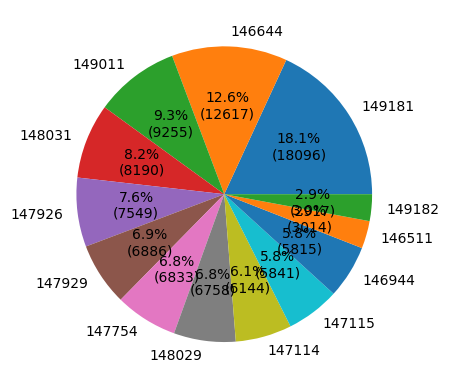

In [5]:
run_value_counts = df['Run'].value_counts()

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

plt.pie(
    run_value_counts,
    labels = run_value_counts.index,
    autopct = autopct_format(run_value_counts)
  )
plt.show()

### 4.2. How Many Dielectrons occur per Event?

In [6]:
df.Event.value_counts().value_counts()

count
1    99869
2       20
3        2
Name: count, dtype: int64

#### 4.2.1. It is unclear whether multiple rows with the same Event number are duplicates.

In [7]:
df.Event.value_counts().head(10)

Event
440012942    3
439950319    3
519135297    2
337473110    2
337851094    2
338078762    2
406690266    2
407076179    2
407103633    2
541698960    2
Name: count, dtype: int64

#### 4.2.2. Check a few unique Event numbers.

In [8]:
df[df['Event'] == 439950319]

Run      Event       E1      px1      py1      pz1      pt1  \
73917  148029  439950319  170.045 -33.4206  12.4213  166.265  35.6543   
73919  148029  439950319  170.045 -33.4206  12.4213  166.265  35.6543   
73921  148029  439950319  170.045 -33.4206  12.4213  166.265  35.6543   

          eta1     phi1  Q1       E2      px2       py2      pz2      pt2  \
73917  2.24416  2.78575   1  9.52881 -2.45649  0.300765  9.20182  2.47483   
73919  2.24416  2.78575   1  9.52881 -2.45649  0.300765  9.20182  2.47483   
73921  2.24416  2.78575   1  9.52881 -2.45649  0.300765  9.20182  2.47483   

          eta2     phi2  Q2        M  
73917  2.02399  3.01976   1  3.01778  
73919  2.02399  3.01976   1  3.01778  
73921  2.02399  3.01976   1  3.01778

In [9]:
df[df['Event'] == 439950319]

Run      Event       E1      px1      py1      pz1      pt1  \
73917  148029  439950319  170.045 -33.4206  12.4213  166.265  35.6543   
73919  148029  439950319  170.045 -33.4206  12.4213  166.265  35.6543   
73921  148029  439950319  170.045 -33.4206  12.4213  166.265  35.6543   

          eta1     phi1  Q1       E2      px2       py2      pz2      pt2  \
73917  2.24416  2.78575   1  9.52881 -2.45649  0.300765  9.20182  2.47483   
73919  2.24416  2.78575   1  9.52881 -2.45649  0.300765  9.20182  2.47483   
73921  2.24416  2.78575   1  9.52881 -2.45649  0.300765  9.20182  2.47483   

          eta2     phi2  Q2        M  
73917  2.02399  3.01976   1  3.01778  
73919  2.02399  3.01976   1  3.01778  
73921  2.02399  3.01976   1  3.01778

In [10]:
df[df['Event'] == 440012942]

Run      Event       E1      px1      py1      pz1      pt1  \
73918  148029  440012942  15.3638  13.1088  1.82845  7.80152  13.2357   
73920  148029  440012942  15.3638  13.1088  1.82845  7.80152  13.2357   
73922  148029  440012942  15.3638  13.1088  1.82845  7.80152  13.2357   

           eta1      phi1  Q1       E2      px2      py2      pz2     pt2  \
73918  0.559741  0.138589   1  3.66866 -1.85461  2.39509  2.06955  3.0292   
73920  0.559741  0.138589   1  3.66866 -1.85461  2.39509  2.06955  3.0292   
73922  0.559741  0.138589   1  3.66866 -1.85461  2.39509  2.06955  3.0292   

           eta2     phi2  Q2        M  
73918  0.638851  2.22969   1  10.9682  
73920  0.638851  2.22969   1  10.9682  
73922  0.638851  2.22969   1  10.9682

#### 4.2.3. So, remove assumed duplicates.

In [11]:
df = df.drop_duplicates(ignore_index = True)
df.shape

(99892, 19)

### 4.3. View distribution of features.

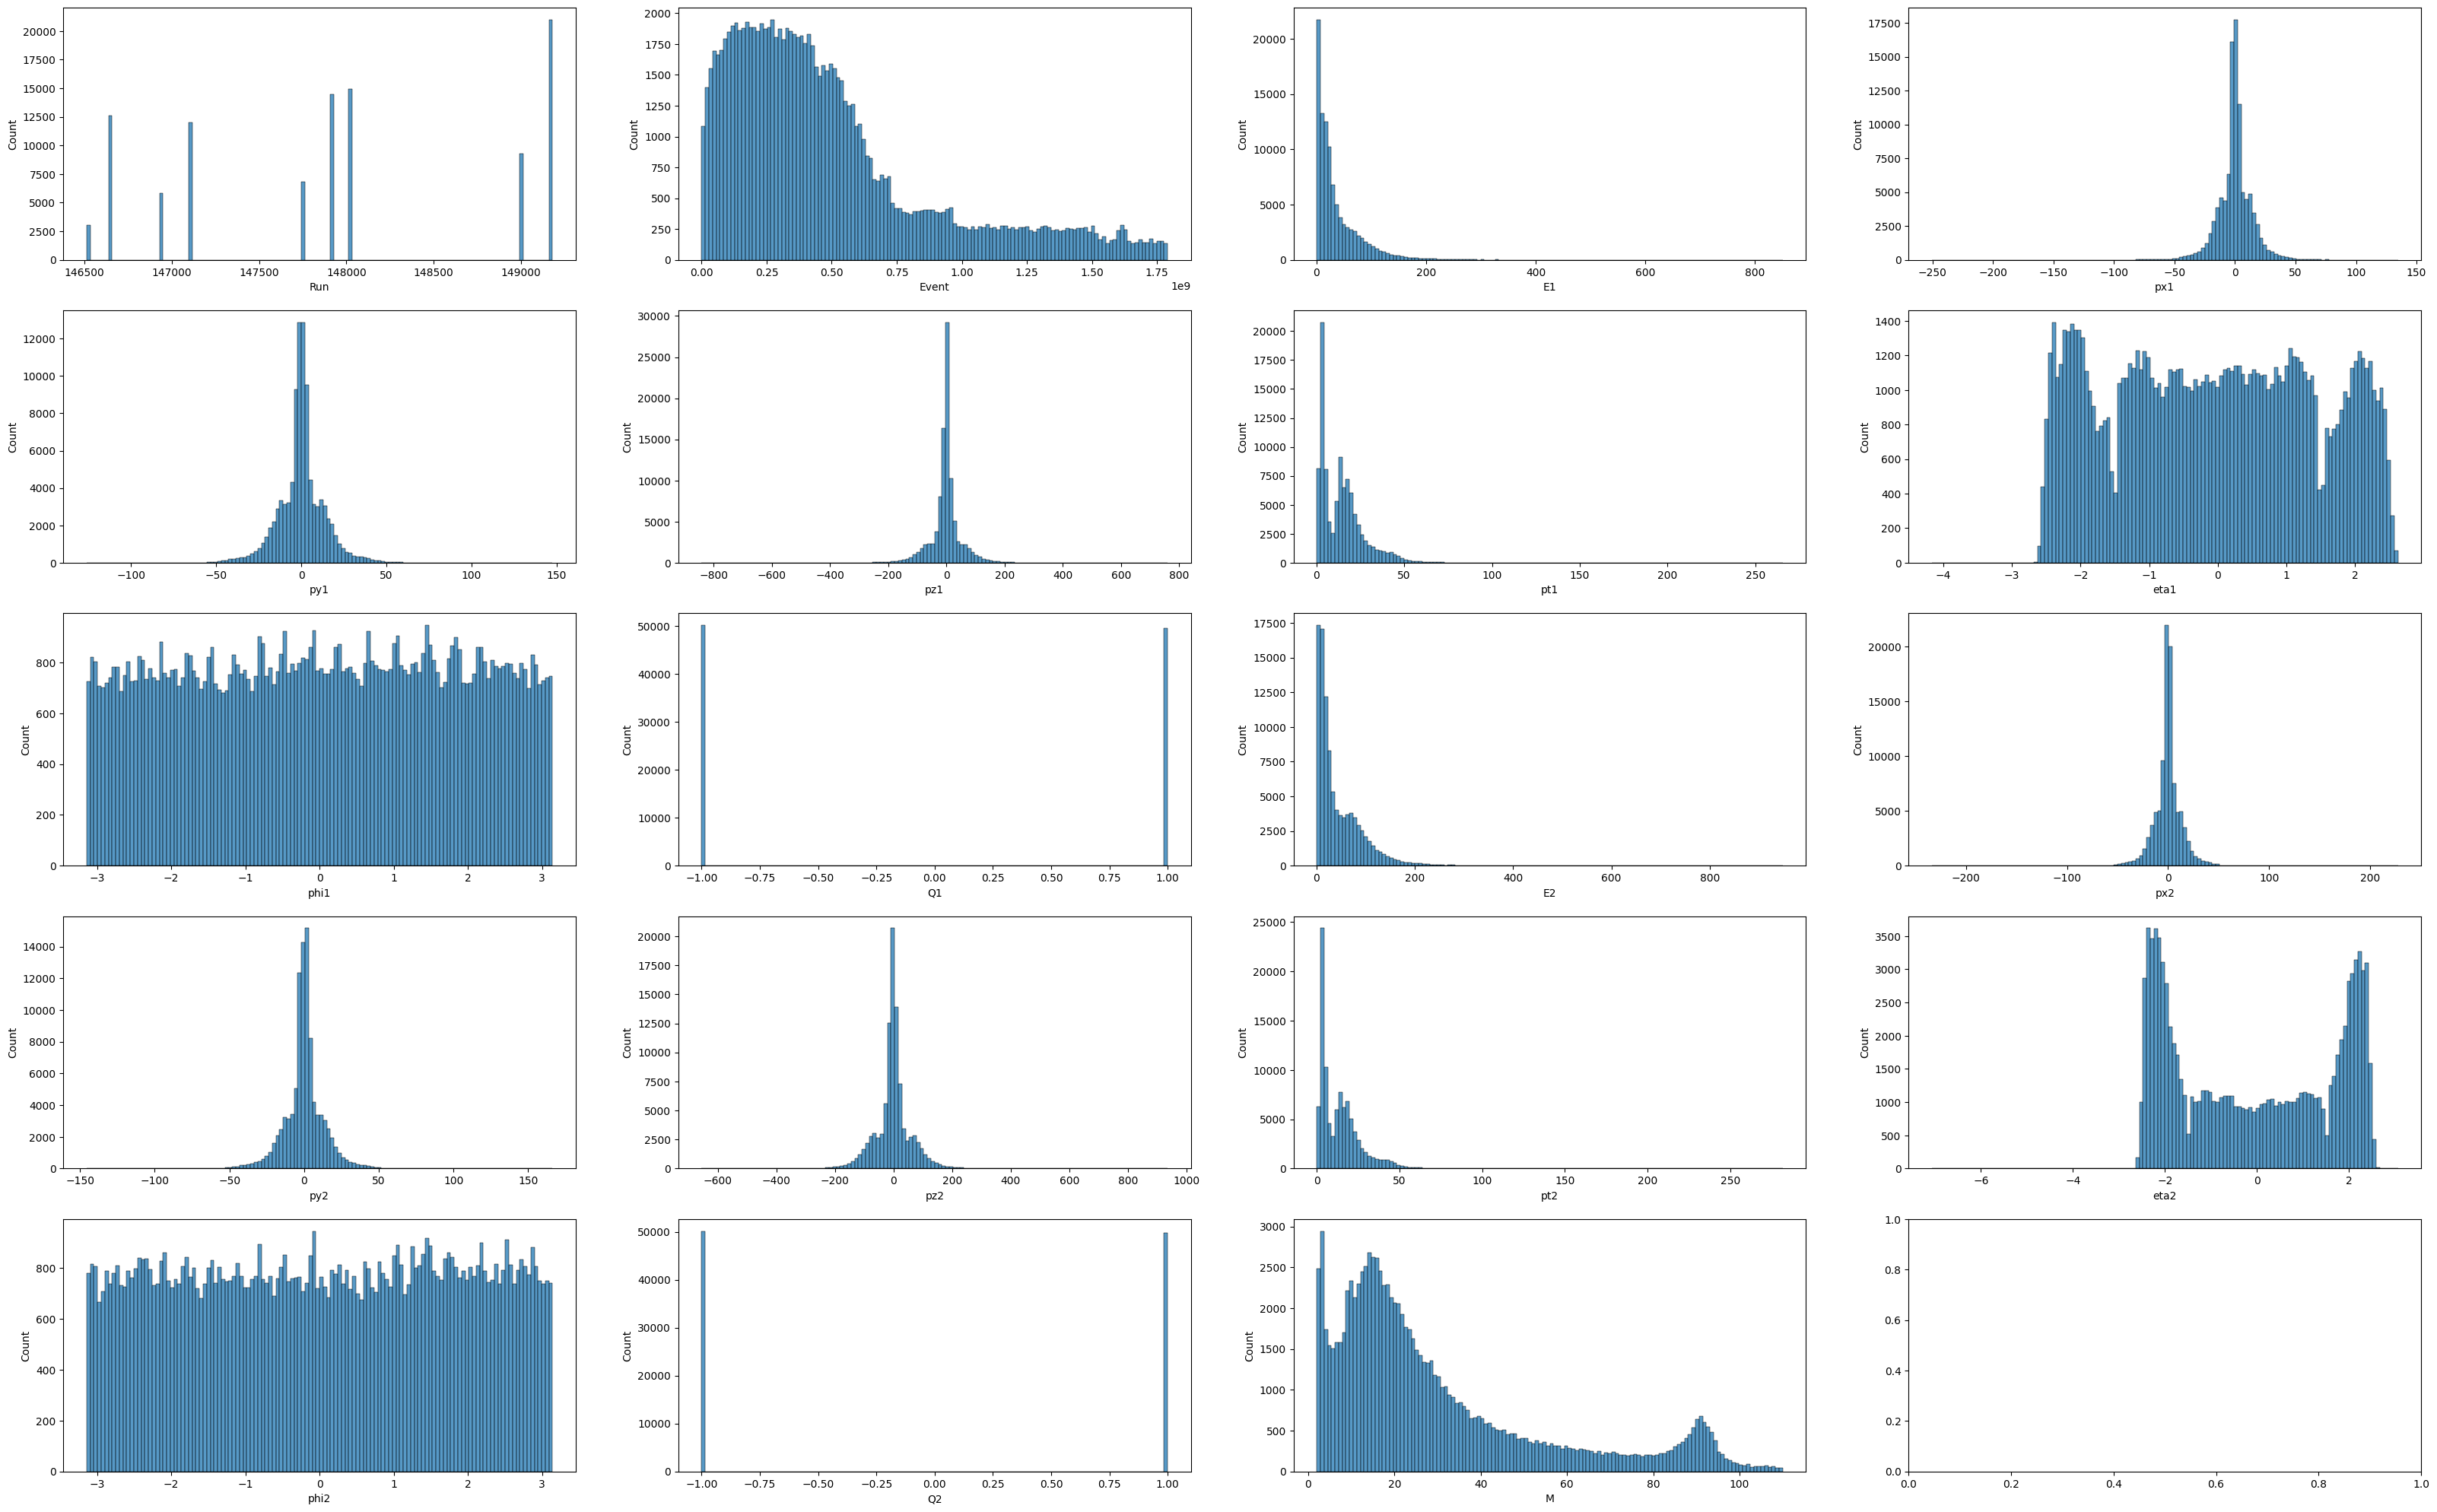

In [12]:
fig, axes = plt.subplots(5, 4)
fig.set_figwidth(40)
fig.set_figheight(25)

for figrow in range(5):
    for figcol in range(4):
        if (figrow + 1) * (figcol + 1) < len(df.columns) + 1:
            feature = df.columns[(figrow * 4) + figcol]
            sns.histplot(df[feature], bins = 128, ax = axes[figrow][figcol])

### 4.4. View more detailed distribution of electron transverse momentum.

<Axes: ylabel='pt2'>

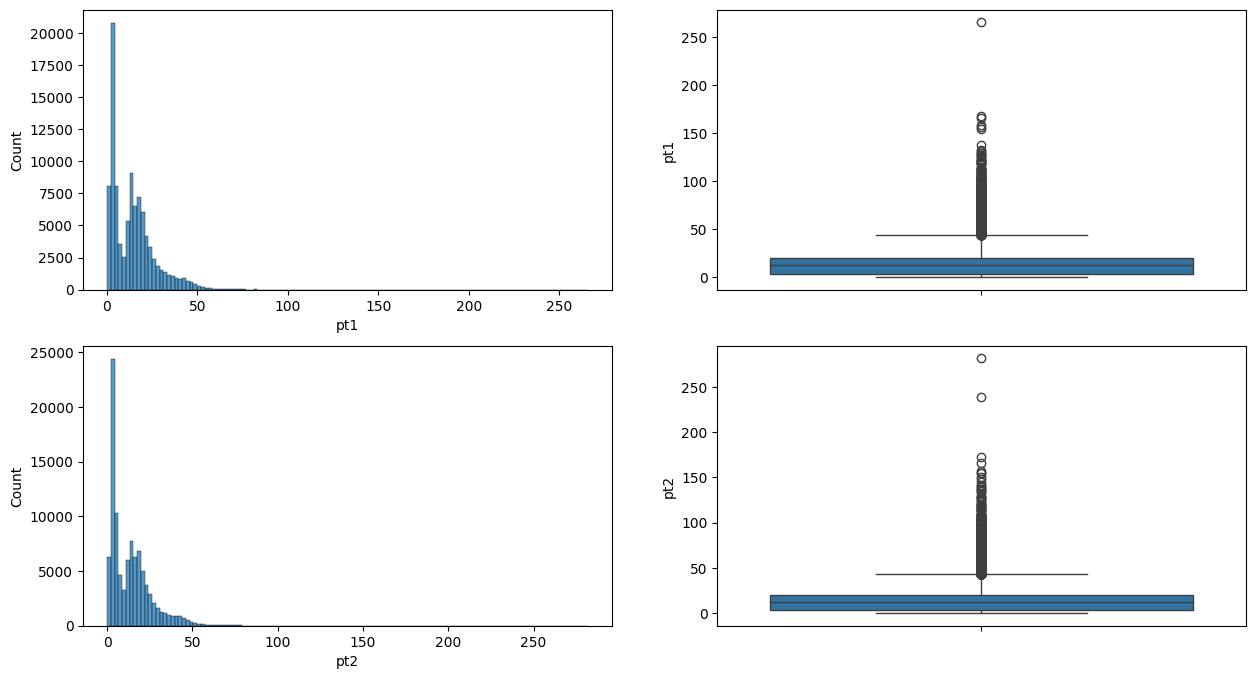

In [13]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
fig.set_figwidth(15)
fig.set_figheight(8)
sns.histplot(df.pt1, bins = 128, ax = ax1)
sns.boxplot(df.pt1, ax = ax2)
sns.histplot(df.pt2, bins = 128, ax = ax3)
sns.boxplot(df.pt2, ax = ax4)

#### 4.4.1. Remove extreme outliers.

In [14]:
df = df[df.pt1 < 60]
df = df[df.pt2 < 60]
df = df[df.eta1 > -2.8]
df = df[df.eta2 > -2.8]
df = df[df.eta2 < 2.8]
df.shape

(98823, 19)

<Axes: ylabel='pt2'>

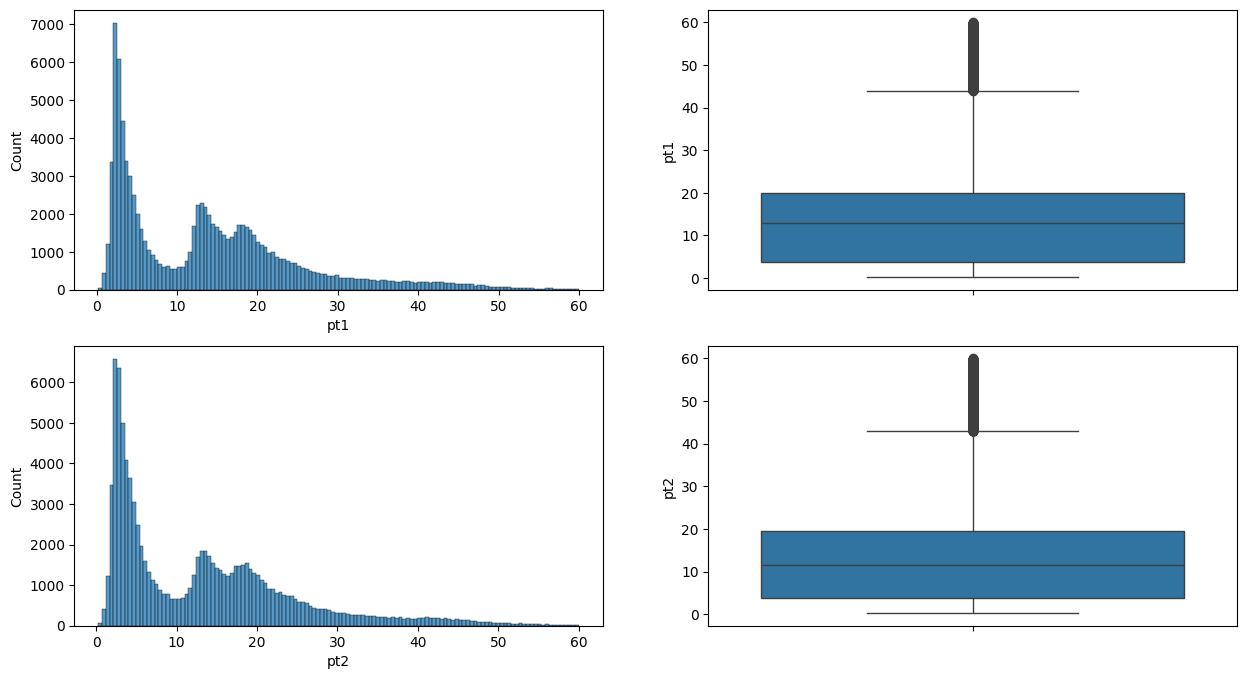

In [15]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2)
fig.set_figwidth(15)
fig.set_figheight(8)
sns.histplot(df.pt1, bins = 128, ax = ax1)
sns.boxplot(df.pt1, ax = ax2)
sns.histplot(df.pt2, bins = 128, ax = ax3)
sns.boxplot(df.pt2, ax = ax4)

### 4.5. Do positive and negative charge electrons have a similarly distributed transverse momentum?

#### 4.5.1. Is there always a positive and negative charge electron?

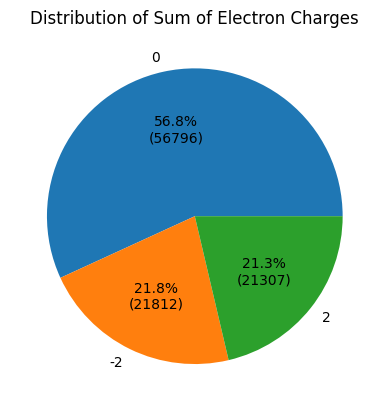

Qsum
 0    56175
-2    21574
 2    21074
Name: count, dtype: int64

In [16]:
df['Qsum'] = df.Q1 + df.Q2
plt.pie(
    df.Qsum.value_counts(),
    labels = df.Qsum.value_counts().index,
    autopct = autopct_format(run_value_counts)
  )
plt.title("Distribution of Sum of Electron Charges")
plt.show()
df.Qsum.value_counts()

#### 4.5.2. Create new dataframes for negative and positive charge electrons.

In [17]:
pos1 = pd.DataFrame(df[df['Q1'] == 1][['Q1', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1']])
pos1 = pos1.rename({
    'Q1'   : 'Q',
    'E1'   : 'E',
    'px1'  : 'px',
    'py1'  : 'py',
    'pz1'  : 'pz',
    'pt1'  : 'pt',
    'eta1' : 'eta',
    'phi1' : 'phi',
}, axis = 1)

pos2 = pd.DataFrame(df[df['Q2'] == 1][['Q2', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2']])
pos2 = pos2.rename({
    'Q2'   : 'Q',
    'E2'   : 'E',
    'px2'  : 'px',
    'py2'  : 'py',
    'pz2'  : 'pz',
    'pt2'  : 'pt',
    'eta2' : 'eta',
    'phi2' : 'phi',
}, axis = 1)

pos_df = pd.concat([pos1, pos2])
pos_df

Q         E         px         py         pz        pt       eta  \
0      1  58.71410  -7.311320  10.531000 -57.297400  12.82020 -2.202670   
2      1  25.54190 -11.480900   2.041680  22.724600  11.66100  1.420480   
3      1  65.39590   7.512140  11.887100  63.866200  14.06190  2.218380   
6      1  84.50580   8.824360  10.578900  83.375300  13.77610  2.500320   
7      1  77.00570  10.002900   9.175450 -75.800000  13.57370 -2.421030   
...   ..       ...        ...        ...        ...       ...       ...   
99883  1  21.01240  -4.489890   0.352345  20.524100   4.50369  2.221670   
99884  1   2.69540   1.385470   2.195680   0.724318   2.59625  0.275488   
99887  1   1.80181   0.668609  -1.584370   0.537805   1.71967  0.307851   
99888  1  14.69110  -1.418020  -2.281170 -14.443500   2.68598 -2.383880   
99890  1   8.58671   0.378009   3.078280   8.007050   3.10141  1.677170   

            phi  
0      2.177660  
2      2.965600  
3      1.007210  
6      0.875576  
7      0.742282  
...         ...  
99883  3.063280  
99884  1.007890  
99887 -1.171470  
99888 -2.126960  
99890  1.448610  

[98323 rows x 8 columns]

In [18]:
neg1 = pd.DataFrame(df[df['Q1'] == -1][['Q1', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1']])
neg1 = neg1.rename({
    'Q1'   : 'Q',
    'E1'   : 'E',
    'px1'  : 'px',
    'py1'  : 'py',
    'pz1'  : 'pz',
    'pt1'  : 'pt',
    'eta1' : 'eta',
    'phi1' : 'phi',
}, axis = 1)

neg2 = pd.DataFrame(df[df['Q2'] == -1][['Q2', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2']])
neg2 = neg2.rename({
    'Q2'   : 'Q',
    'E2'   : 'E',
    'px2'  : 'px',
    'py2'  : 'py',
    'pz2'  : 'pz',
    'pt2'  : 'pt',
    'eta2' : 'eta',
    'phi2' : 'phi',
}, axis = 1)

neg_df = pd.concat([neg1, neg2])
neg_df

Q         E         px         py         pz        pt       eta  \
1     -1   6.61188  -4.152130  -0.579855  -5.112780   4.19242 -1.028420   
4     -1  61.45040   2.952840 -14.622700 -59.612100  14.91790 -2.093750   
5     -1   6.39616  -5.456720  -2.090680  -2.600780   5.84352 -0.431551   
11    -1   2.91574   2.297280  -1.262960   1.276310   2.62156  0.469419   
14    -1   8.37299  -3.258490   3.000070   7.105550   4.42924  1.251230   
...   ..       ...        ...        ...        ...       ...       ...   
99878 -1  12.51170   6.395170 -10.724900   0.788666  12.48690  0.063118   
99880 -1  20.45610   3.068200  -3.162430  19.975900   4.40623  2.216600   
99885 -1   1.23867  -0.089044   1.174990   0.381819   1.17836  0.318609   
99889 -1  72.81740 -11.074900  -9.281790 -71.369300  14.45010 -2.300410   
99891 -1  52.10880  16.807500  -4.605100  49.108400  17.42700  1.759250   

            phi  
1     -3.002840  
4     -1.371540  
5     -2.775710  
11    -0.502660  
14     2.397460  
...         ...  
99878 -1.033110  
99880 -0.800520  
99885  1.646430  
99889 -2.444050  
99891 -0.267427  

[99323 rows x 8 columns]

#### 4.5.3. View the distribution of transverse momentum values for positively and negatively charged electrons.

Text(0.5, 0, 'negative electron pt')

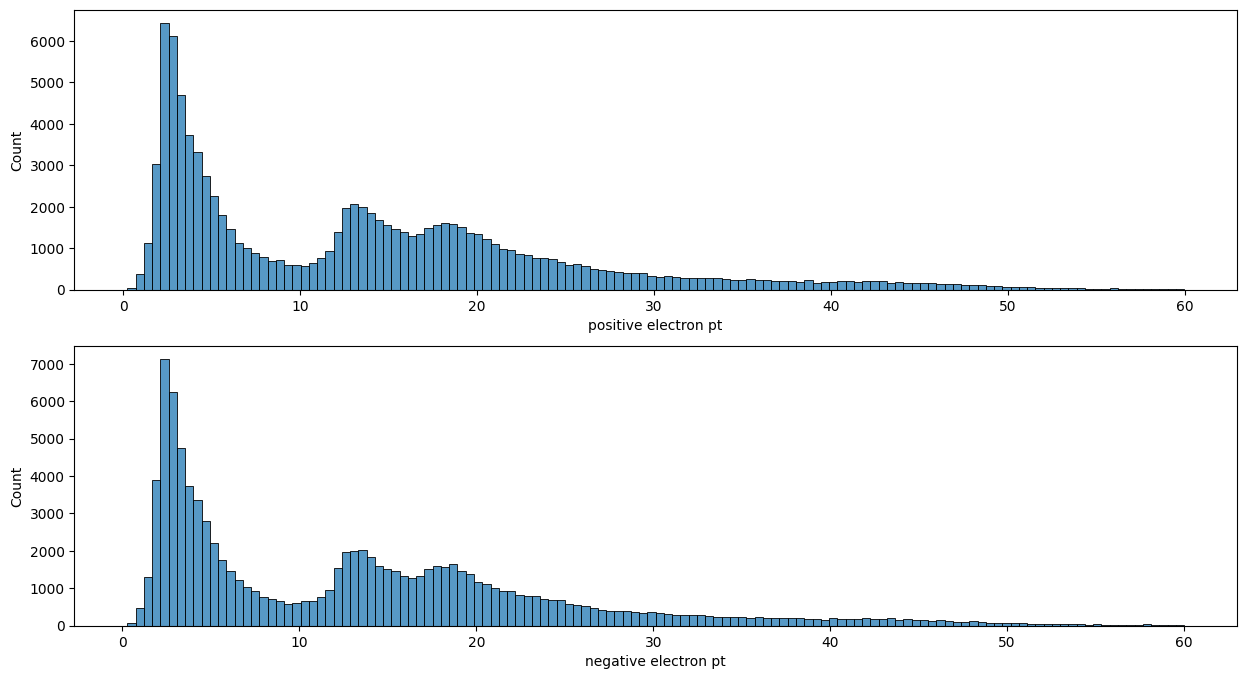

In [19]:
fig, (ax1, ax2) = plt.subplots(2)
fig.set_figwidth(15)
fig.set_figheight(8)
sns.histplot(pos_df.pt, bins = 128, ax = ax1)
ax1.set_xlabel("positive electron pt")
sns.histplot(neg_df.pt, bins = 128, ax = ax2)
ax2.set_xlabel("negative electron pt")

### 4.6. Plot transverse momentum against other variables.

#### 4.6.1. pt1 and pt2 against the variables of electron 1.

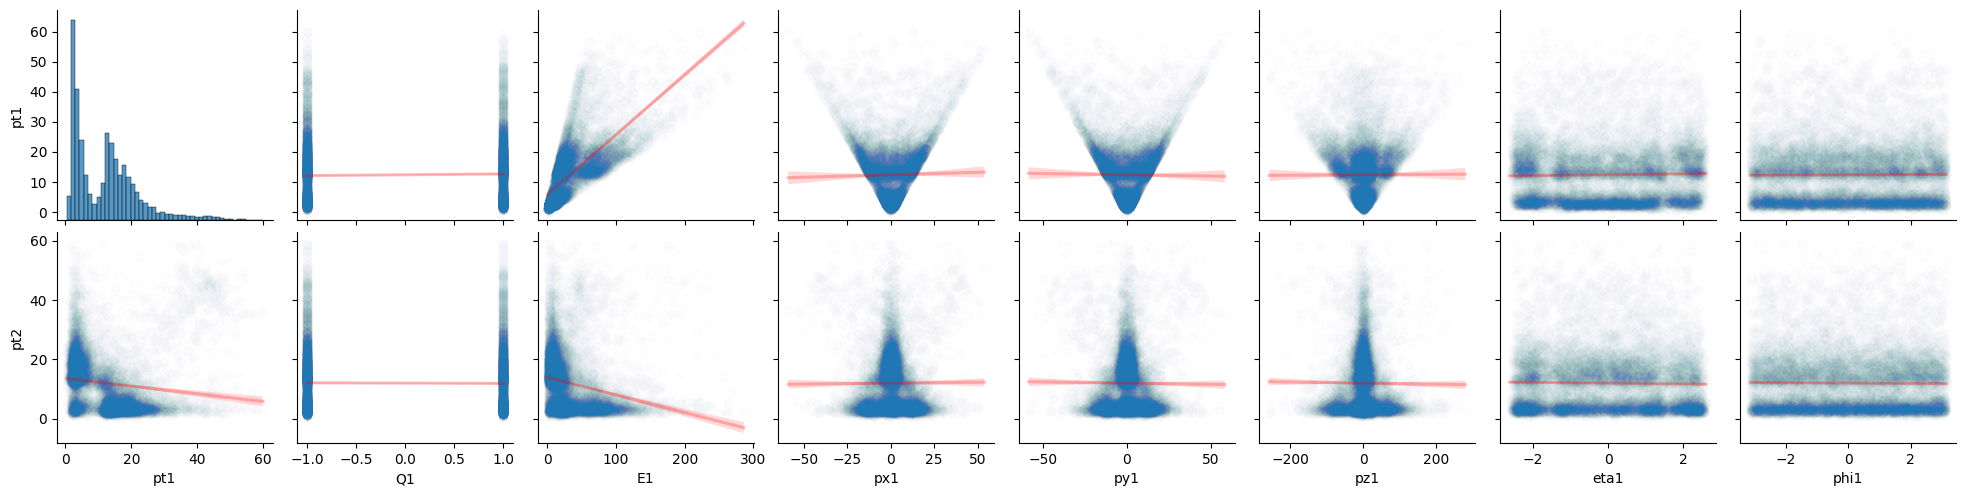

In [20]:
sns.pairplot(
    df.head(10000),
    kind     = 'reg',
    y_vars   = ['pt1', 'pt2'],
    x_vars   = ['pt1', 'Q1', 'E1', 'px1', 'py1', 'pz1', 'eta1', 'phi1'],
    plot_kws = {
        'line_kws'    : {'color' : 'red', 'alpha' : 0.25},
        'scatter_kws' : {'alpha' :  0.0075}
    }
)

#### 4.6.2. pt1 and pt2 against the variables of electron 2.

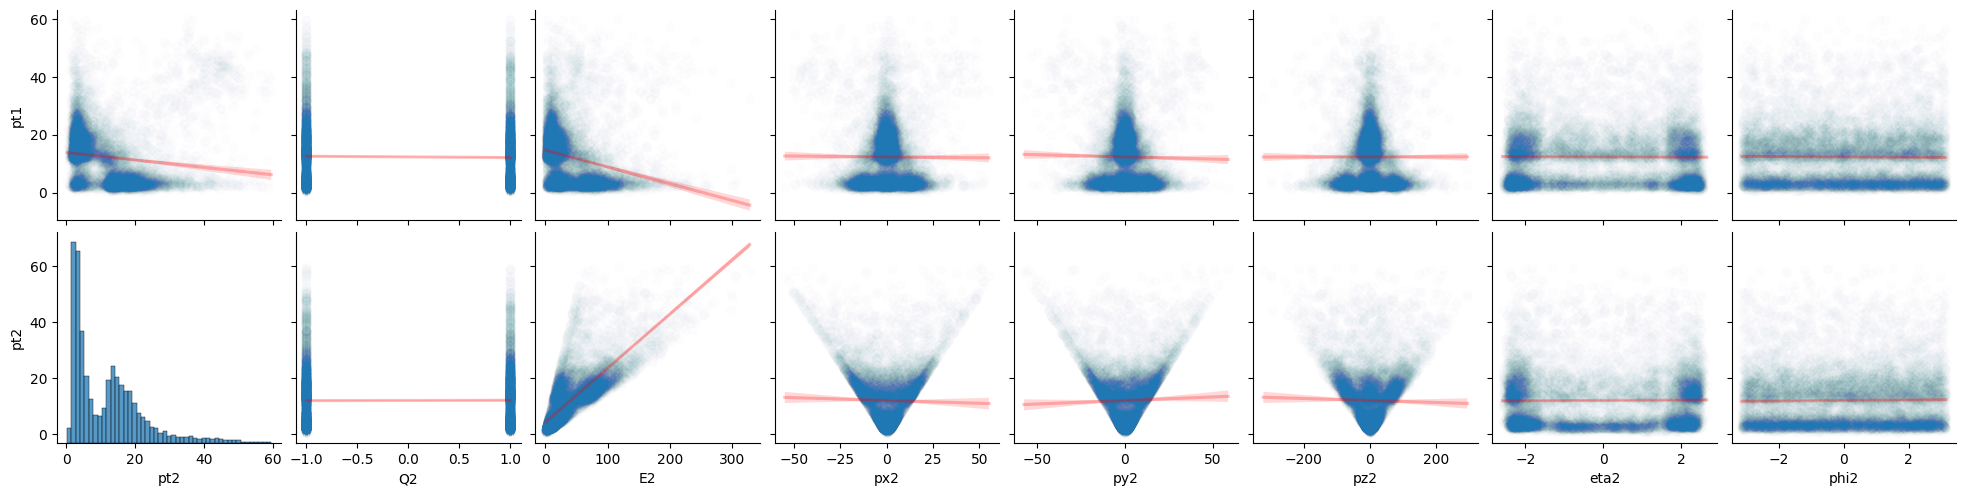

In [21]:
sns.pairplot(
    df.head(10000),
    kind     = 'reg',
    y_vars   = ['pt1', 'pt2'],
    x_vars   = ['pt2', 'Q2', 'E2', 'px2', 'py2', 'pz2', 'eta2', 'phi2'],
    plot_kws = {
        'line_kws'    : {'color' : 'red', 'alpha' : 0.25},
        'scatter_kws' : {'alpha' :  0.0075}
    }
)

### 4.7. Feature Engineering.

#### 4.7.1. Include absolute value of momentum values ([px, py, pz]).

In [22]:
for col in ['px1', 'py1', 'pz1', 'pt1', 'px2', 'py2', 'pz2', 'pt2']:
    new_col_str = col + '_abs'
    df[new_col_str] = np.square(df[col])

df.head()

Run      Event        E1       px1        py1       pz1       pt1  \
0  147115  366639895  58.71410  -7.31132  10.531000 -57.29740  12.82020   
1  147115  366704169   6.61188  -4.15213  -0.579855  -5.11278   4.19242   
2  147115  367112316  25.54190 -11.48090   2.041680  22.72460  11.66100   
3  147115  366952149  65.39590   7.51214  11.887100  63.86620  14.06190   
4  147115  366523212  61.45040   2.95284 -14.622700 -59.61210  14.91790   

      eta1     phi1  Q1  ...         M  Qsum     px1_abs     py1_abs  \
0 -2.20267  2.17766   1  ...   8.94841     0   53.455400  110.901961   
1 -1.02842 -3.00284  -1  ...  15.89300     0   17.240184    0.336232   
2  1.42048  2.96560   1  ...  38.38770     2  131.811065    4.168457   
3  2.21838  1.00721   1  ...   3.72862     0   56.432247  141.303146   
4 -2.09375 -1.37154  -1  ...   2.74718    -2    8.719264  213.823355   

       pz1_abs     pt1_abs     px2_abs    py2_abs     pz2_abs     pt2_abs  
0  3282.992047  164.357528    1.065726   3.536882  122.717653    4.602612  
1    26.140519   17.576385  137.206082  25.449402  131.439346  162.654313  
2   516.407445  135.978921    2.169140   5.102855  243.010685    7.272029  
3  4078.891502  197.737032   16.710599   6.741345  607.933130   23.451937  
4  3553.602466  222.543740    0.077149   5.883535  186.890773    5.960678  

[5 rows x 28 columns]

##### 4.7.1.1. Plot new features against pt1.

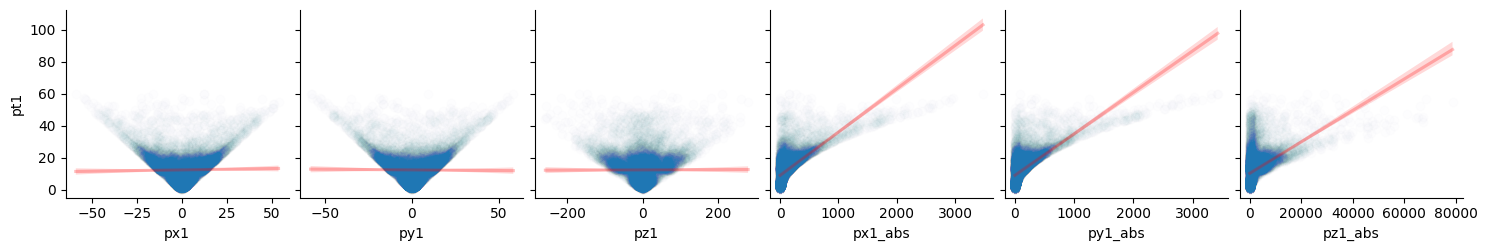

In [23]:
sns.pairplot(
    df.head(10000),
    kind     = 'reg',
    y_vars   = ['pt1'],
    x_vars   = ['px1', 'py1', 'pz1', 'px1_abs', 'py1_abs', 'pz1_abs'],
    plot_kws = {
        'line_kws'    : {'color' : 'red', 'alpha' : 0.25},
        'scatter_kws' : {'alpha' :  0.0075}
    }
)

##### 4.7.1.2. Plot new features against pt2.

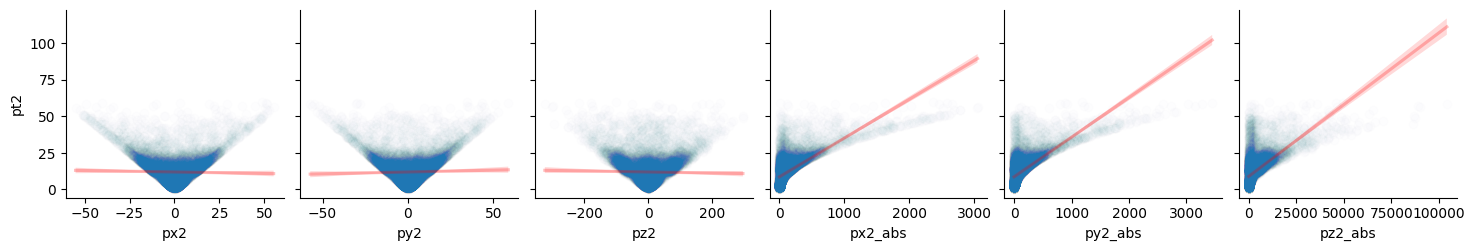

In [24]:
sns.pairplot(
    df.head(10000),
    kind     = 'reg',
    y_vars   = ['pt2'],
    x_vars   = ['px2', 'py2', 'pz2', 'px2_abs', 'py2_abs', 'pz2_abs'],
    plot_kws = {
        'line_kws'    : {'color' : 'red', 'alpha' : 0.25},
        'scatter_kws' : {'alpha' :  0.0075}
    }
)

### 4.8. Look for Qsum value distribution.

#### 4.8.1. Check each run for a higher concentration of zero-sum events.

In [25]:
for run in df.Run.unique():
    print("Run:", run)
    temp_df = df[df.Run == run]
    print(temp_df.Qsum.value_counts())
    print("Zero-sum percentage:", np.round((len(temp_df[temp_df.Qsum == 0]) / len(temp_df) * 100), 2), "%")
    print()

Run: 147115
Qsum
 0    3175
-2    1322
 2    1304
Name: count, dtype: int64
Zero-sum percentage: 54.73 %

Run: 146644
Qsum
 0    6894
-2    2928
 2    2715
Name: count, dtype: int64
Zero-sum percentage: 54.99 %

Run: 149181
Qsum
 0    10439
 2     3707
-2     3622
Name: count, dtype: int64
Zero-sum percentage: 58.75 %

Run: 147114
Qsum
 0    3368
 2    1370
-2    1367
Name: count, dtype: int64
Zero-sum percentage: 55.17 %

Run: 149011
Qsum
 0    5302
-2    1972
 2    1821
Name: count, dtype: int64
Zero-sum percentage: 58.3 %

Run: 148031
Qsum
 0    4626
-2    1852
 2    1632
Name: count, dtype: int64
Zero-sum percentage: 57.04 %

Run: 147754
Qsum
 0    3889
-2    1453
 2    1422
Name: count, dtype: int64
Zero-sum percentage: 57.5 %

Run: 147929
Qsum
 0    3848
 2    1536
-2    1449
Name: count, dtype: int64
Zero-sum percentage: 56.31 %

Run: 148029
Qsum
 0    3772
-2    1492
 2    1428
Name: count, dtype: int64
Zero-sum percentage: 56.37 %

Run: 147926
Qsum
 0    4257
-2    1626
 2    

#### 4.8.2. Color by mass and find pattern with high zero-sum distribution.

<Axes: xlabel='pt2_abs', ylabel='pt1_abs'>

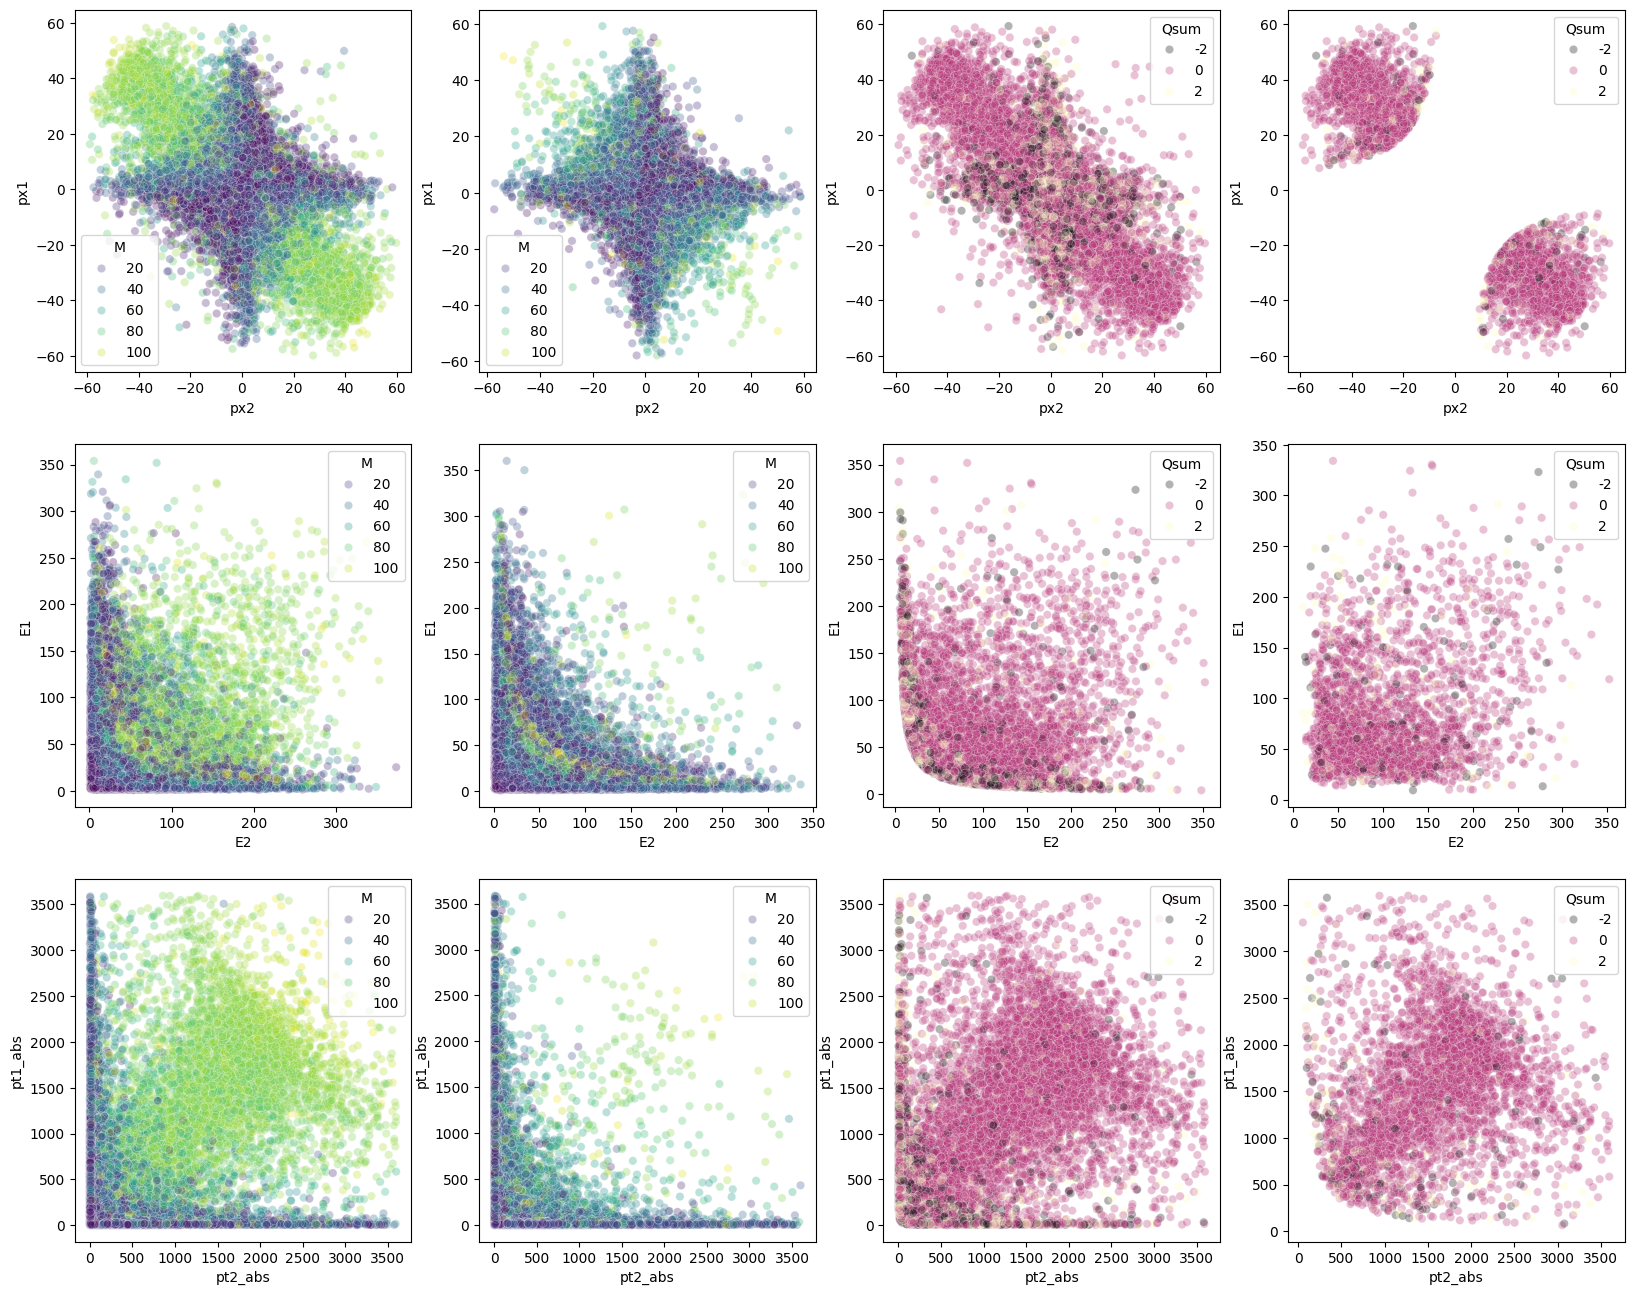

In [26]:
fig, ([ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8], [ax9, ax10, ax11, ax12]) = plt.subplots(3, 4)
fig.set_figwidth(20)
fig.set_figheight(16)

a_bool = (df['px2'] < 0) & (df['px1'] > (-400/df['px2']))
b_bool = (df['px2'] > 0) & (df['px1'] < (-400/df['px2']))
idx = a_bool | b_bool

sns.scatterplot(data=df[df.Qsum == 0], y="px1", x="px2", hue = "M", alpha = 0.3, palette = 'viridis', ax = ax1)
sns.scatterplot(data=df[df.Qsum != 0], y="px1", x="px2", hue = "M", alpha = 0.3, palette = 'viridis', ax = ax2)
sns.scatterplot(data=df[(df['M'] > 60)], y="px1", x="px2", hue = "Qsum", alpha = 0.3, palette = 'magma', ax = ax3)
sns.scatterplot(data=df[idx], y="px1", x="px2", hue = "Qsum", alpha = 0.3, palette = 'magma', ax = ax4)

sns.scatterplot(data=df[df.Qsum == 0], y="E1", x="E2", hue = "M", alpha = 0.3, palette = 'viridis', ax = ax5)
sns.scatterplot(data=df[df.Qsum != 0], y="E1", x="E2", hue = "M", alpha = 0.3, palette = 'viridis', ax = ax6)
sns.scatterplot(data=df[(df['M'] > 60)], y="E1", x="E2", hue = "Qsum", alpha = 0.3, palette = 'magma', ax = ax7)
sns.scatterplot(data=df[idx], y="E1", x="E2", hue = "Qsum", alpha = 0.3, palette = 'magma', ax = ax8)

sns.scatterplot(data=df[df.Qsum == 0], y="pt1_abs", x="pt2_abs", hue = "M", alpha = 0.3, palette = 'viridis', ax = ax9)
sns.scatterplot(data=df[df.Qsum != 0], y="pt1_abs", x="pt2_abs", hue = "M", alpha = 0.3, palette = 'viridis', ax = ax10)
sns.scatterplot(data=df[(df['M'] > 60)], y="pt1_abs", x="pt2_abs", hue = "Qsum", alpha = 0.3, palette = 'magma', ax = ax11)
sns.scatterplot(data=df[idx], y="pt1_abs", x="pt2_abs", hue = "Qsum", alpha = 0.3, palette = 'magma', ax = ax12)

## 5. Model Building.

### 5.1. Normalize data.

In [27]:
y = df[['Qsum']]
X = df.drop(['Q1', 'Q2', 'Qsum'], axis=1)

scaler = StandardScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print(X_norm.shape)
print(y.shape)

(98823, 25)
(98823, 1)


### 5.2. Replace label "-2" with "1" to make things easer for model training.

In [28]:
y[y['Qsum'] == -2] = 1

/var/folders/sg/s2pmpvfj42b35zzctr2whzcr0000gn/T/ipykernel_39624/2680303286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y['Qsum'] == -2] = 1
/var/folders/sg/s2pmpvfj42b35zzctr2whzcr0000gn/T/ipykernel_39624/2680303286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y['Qsum'] == -2] = 1


### 5.3. Split the data into train, validation, test.

In [29]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X_norm, y, test_size=0.4, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(59293, 25) (19765, 25) (19765, 25)
(59293, 1) (19765, 1) (19765, 1)


### 5.4. Can we predict the electron charges (E1 & E2)?

#### 5.4.1. Baseline model: majory class predictor.

Score 0.5721224386541867


Text(95.72222222222221, 0.5, 'Truth')

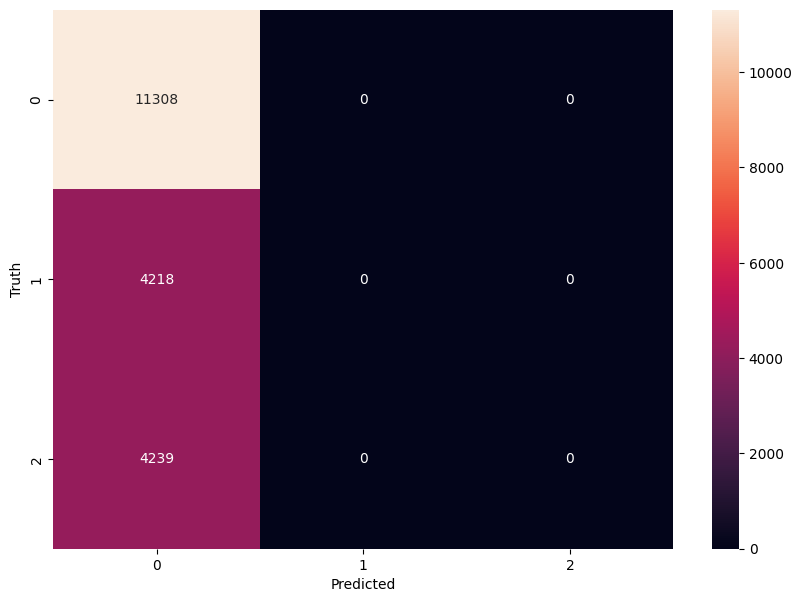

In [30]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
print("Score", dummy_clf.score(X_test, y_test))

y_pred = dummy_clf.predict(X_test)
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### 5.4.2. Random Forest Classifier.

In [ ]:
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of trees
    'max_depth': [None, 10, 20, 30],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt'],     # Number of features to consider at each split
    'bootstrap': [True, False]            # Whether bootstrap samples are used
}

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_grid,
    n_iter=50,                         # Number of parameter settings sampled
    cv=3,                              # 3-fold cross-validation
    n_jobs=-1,                         # Use all available cores
    verbose=2,                         # Verbosity level
    scoring='accuracy',                # Metric to optimize
    random_state=42                    # For reproducibility
)

# Fit the model with parallel_backend to avoid os.fork() issues
with parallel_backend('multiprocessing'):
    random_search.fit(X_train, y_train.values.ravel())

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Use the best model to predict on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy * 100:.2f}%")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:66: FutureWarning: Class parallel_backend is deprecated; deprecated in 1.5 to be removed in 1.7. Use joblib.{} instead.
  warnings.warn(msg, category=FutureWarning)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
# Generate and plot the confusion matrix
conf_matrix = tf.math.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

##### 5.4.2.1. Show the final tree from the Random Forest fit.

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)

tree.plot_tree(
    rf_clf.estimators_[0],
    feature_names = X.columns,
    filled = True
)

fig.savefig('rf_individualtree.png')

#### 5.4.3. Convolutional Neural Net 1

In [ ]:
# Define the CNN model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax') # 3 output classes: -2, 0, 2
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

#### 5.4.4. Convolutional Neural Net 2

In [ ]:
# CNN model2
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dropout(0.3),  # Add dropout for regularization
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True
)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)  # Adjust learning rate
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64,
                    validation_data=(X_val, y_val))  # Increase epochs, adjust batch size

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.summary()

#### 5.4.5. Randomized Search CV

In [ ]:
import tensorflow as tf
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

# Custom Keras classifier wrapper
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn=create_model, **params):
        self.build_fn = build_fn
        self.params = params
        self.model = None
        self.set_params(**params)

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

    def get_params(self, deep=True):
        return self.params

    def fit(self, X, y, **fit_params):
        X, y = check_X_y(X, y)
        self.model = self.build_fn(**self.params)
        self.model.fit(X, y, **fit_params)
        return self

    def predict(self, X):
        check_is_fitted(self, 'model')
        X = check_array(X)
        return self.model.predict_classes(X)

    def predict_proba(self, X):
        check_is_fitted(self, 'model')
        X = check_array(X)
        return self.model.predict(X)

    def score(self, X, y):
        check_is_fitted(self, 'model')
        X, y = check_X_y(X, y)
        return self.model.evaluate(X, y, verbose=0)[1]

# Define the model
def create_model(num_filters=32, kernel_size=3, activation='relu', learning_rate=0.001, dropout_rate=0.5):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(num_filters, (kernel_size, kernel_size), activation=activation, input_shape=(17,)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(num_filters * 2, (kernel_size, kernel_size), activation=activation),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=activation),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the custom Keras classifier wrapper
model = KerasClassifierWrapper(build_fn=create_model)

# Define the parameter grid
param_grid = {
    'num_filters': [32, 64, 128],
    'kernel_size': [3, 5, 7],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.2, 0.5],
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   n_iter=20, cv=3, verbose=2, n_jobs=-1, scoring='accuracy')

# Fit the model
print(type(X_train))
print(type(y_train))
random_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Use the best model to predict on the test set
best_model = random_search.best_estimator_.model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test set accuracy: {test_accuracy * 100:.2f}%")


#### 5.4.6. K Nearest Neighbors Classifier

In [ ]:
n = [10,20,30,50,100,200,300,400,500]

for i in n:
  # Create KNN classifier
  knn = KNeighborsClassifier(n_neighbors=i)

  # Train the model
  knn.fit(X_train, y_train.values.ravel())

  # Make predictions
  y_pred = knn.predict(X_test)

  # Evaluate the model
  accuracy = knn.score(X_test, y_test)
  print('Accuracy: %.2f' % (accuracy*100))
